In [189]:
import requests # To make get calls to API
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from bs4 import BeautifulSoup # Helps make parsing html files much easier
from functions import *
import pandas as pd
import spotipy
import numpy as np
from spotipy.oauth2 import SpotifyClientCredentials
from tensorflow import keras 
from keras.utils import np_utils
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import random
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# This token was granted through the use of Genius's website and allows us to make calls to the API
client_access_token = "_mDTViAvedsTbhpMuhLml-2gkMw1DU8tKQRnqmFkQDXT2aypVvCg67wDEr4eqBIs"

In [ ]:
SPOTIPY_CLIENT_ID='19cb7472401c45c2acaa41ad01bb9e6d'
SPOTIPY_CLIENT_SECRET='7d3065a3086746f5bf7f94812e398230'

#Authentication - without user
client_credentials_manager = SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

# RapCaviar Playlist (Import Playlist Here)
# url = "https://open.spotify.com/playlist/37i9dQZF1DX0XUsuxWHRQd"

# Pop 2021
url = "https://open.spotify.com/playlist/02ES3fS2eHdLnDEuEUD60V"
artists = []
results = sp.playlist_items(url)
for idx, item in enumerate(results['items']):
    track = item['track']
    artists.append(track['artists'][0]['name'])
#     print(idx, track['artists'][0]['name'], " - ", track['name'])
result = [] 
[result.append(x) for x in artists if x not in result] 
print(result)


In [ ]:
all_songs = []
for artist_name in result:
    songs = request_song_url(artist_name, 10)
    lyrics = [""] * 10
    index = 0
    for song in songs:
        soup = BeautifulSoup(requests.get(song).content, 'lxml')
        lyrics[index] = ""

        for tag in soup.select('div[class^="Lyrics__Container"], .song_body-lyrics p'):

            for i in tag.select('i'):
                i.unwrap()
            tag.smooth()

            t = tag.get_text(strip=True, separator='\n')

            if t:
                lyrics[index]+=(t)
        print(index)
        index = index + 1
    search_term = artist_name
    genius_search_url = f"http://api.genius.com/search?q={search_term}&access_token={client_access_token}"
    response = requests.get(genius_search_url)
    json_data = response.json()
    for i in range(len(lyrics)):
        lyrics[i]= clean_lyrics(lyrics[i])
    print(lyrics[0])
    index = 0
    for song in json_data['response']['hits']:
        all_songs.append([search_term, song['result']['full_title'], lyrics[index]])
        index += 1

In [ ]:
# song = pd.DataFrame(all_songs)
# song.columns = ['artist_name', 'song_title', 'lyrics']
# compression_opts = dict(method='zip',
#                         archive_name='out.csv') 
# song.to_csv('out.zip', index=False,
#           compression=compression_opts)
song = pd.DataFrame(all_songs)
song.columns = ['artist_name', 'song_title', 'lyrics']
song.to_csv('pop.csv', index=False)

In [64]:
data = pd.read_csv ('pop.csv')
print("Artists in the data:\n",data.artist_name.value_counts()) 


Artists in the data:
 Harry Styles           10
Doja Cat               10
DJ Snake               10
Olivia Rodrigo         10
Marshmello             10
Duncan Laurence        10
Post Malone            10
Surf Mesa              10
Ariana Grande          10
Gryffin                10
NEIKED                 10
Dua Lipa               10
Troye Sivan            10
Taylor Swift           10
Gia Woods              10
Katy Perry             10
The Weeknd             10
Glass Animals          10
Ed Sheeran             10
BTS                    10
JESSIA                 10
The Kid LAROI          10
Shawn Mendes           10
Regard                 10
Justin Bieber          10
Lady Gaga              10
Kali Uchis             10
Billie Eilish          10
Laura Marano           10
Jonas Brothers         10
Swedish House Mafia    10
Conan Gray             10
Sabrina Carpenter      10
FLETCHER               10
Name: artist_name, dtype: int64


In [65]:
data["no_of_characters"] = data["lyrics"].apply(len)
data["no_of_words"]=data.apply(lambda row: nltk.word_tokenize(row["lyrics"]), axis=1).apply(len)
data["no_of_lines"] = data["lyrics"].str.split('\n').apply(len)
data.describe()

,no_of_characters,no_of_words,no_of_lines
count,340.000000,340.000000,340.000000
mean,1681.408824,402.650000,58.500000
std,546.415707,133.637882,16.458135
min,471.000000,119.000000,20.000000
25%,1339.250000,315.250000,46.750000
50%,1649.000000,384.500000,57.000000
75%,1982.500000,478.500000,68.000000
max,4784.000000,1091.000000,124.000000


<Figure size 1080x1080 with 0 Axes>

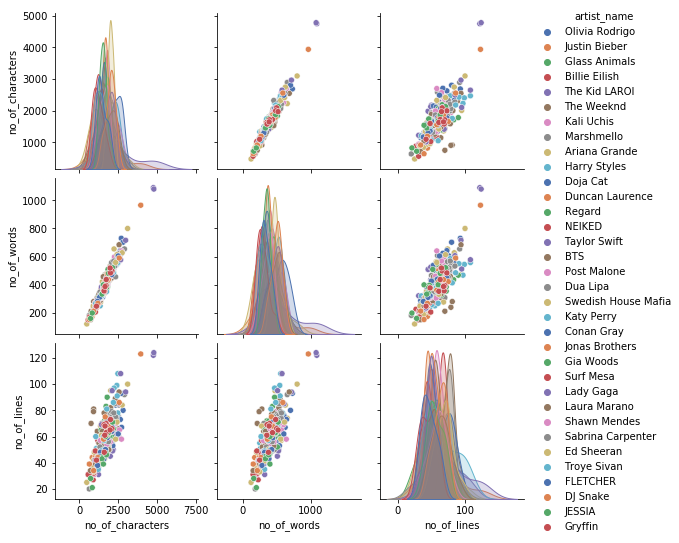

In [66]:
#Plotting the comparative song lengths for various artists
plt.figure(figsize=(15,15))
ax = sns.pairplot(data, hue="artist_name", palette="deep")


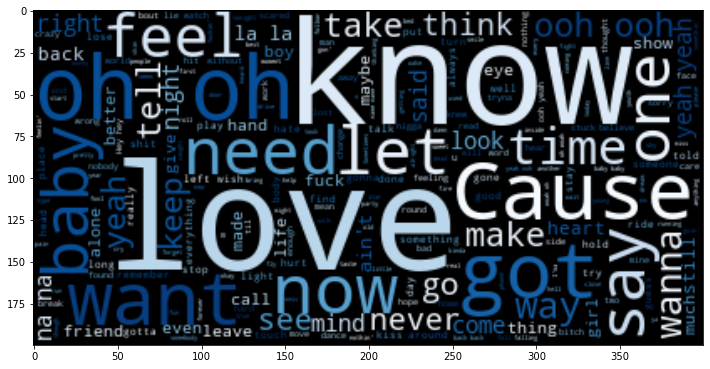

In [67]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="#000000",colormap="Blues", max_words=800).generate(" ".join(data["lyrics"]))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

In [68]:
#Lining up all the lyrics to create corpus
Corpus =''
for listitem in data.lyrics:
    Corpus += listitem
    
Corpus = Corpus.lower() #converting all alphabets to lowecase 
print("Number of unique characters:", len(set(Corpus)))

Number of unique characters: 470


In [69]:
print("The unique characters:",sorted(set(Corpus)))

The unique characters: ['\n', ' ', '!', '"', '&', "'", '*', ',', '-', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '¡', '¿', 'à', 'á', 'é', 'í', 'ï', 'ñ', 'ó', 'ú', 'ü', 'ı', 'œ', 'е', '\u2005', '\u200a', '\u200b', '–', '—', '‘', '’', '“', '”', '…', '\u205f', '中', '在', '站', '間', '가', '각', '간', '갈', '감', '강', '같', '개', '거', '걱', '건', '걸', '것', '게', '겐', '겔', '겠', '겨', '결', '계', '고', '곳', '공', '과', '관', '교', '구', '국', '굴', '그', '금', '기', '긴', '길', '김', '깊', '까', '깜', '깨', '꺾', '껄', '께', '꼴', '꽃', '꽤', '꾸', '꿈', '꿨', '끄', '끝', '끼', '끽', '낌', '나', '난', '날', '남', '났', '낯', '내', '낸', '냐', '너', '넌', '널', '넘', '네', '녀', '녁', '놀', '놓', '누', '눈', '는', '니', '다', '닥', '단', '달', '닮', '당', '닿', '대', '더', '던', '덜', '데', '도', '돌', '됐', '되', '될', '두', '둘', '둠', '득', '든', '듣', '들', '듭', '듯', '따', '때', '떠', '떤', '떨', '또', '뚜', '뛰', '뜬', '뜻', '라', '란', 

In [70]:
Corpus = re.sub("[^A-Za-z0-9'\.\n]"," ",Corpus)

In [71]:
print("The unique characters:",sorted(set(Corpus)))

The unique characters: ['\n', ' ', "'", '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [72]:
print(Corpus)


i got my driver's license last week
just like we always talked about
'cause you were so excited for me
to finally drive up to your house
but today  i drove through the suburbs
crying 'cause you weren't around

and you're probably with that blonde girl
who always made me doubt
she's so much older than me
she's everything i'm insecure about
yeah  today  i drove through the suburbs
'cause how could i ever love someone else 

and i know we weren't perfect
but i've never felt this way for no one
and i just can't imagine
how you could be so okay now that i'm gone
guess you didn't mean what you wrote in that song about me
'cause you said forever  now i drive alone past your street

and all my friends are tired
of hearing how much i miss you  but
i kinda feel sorry for them
'cause they'll never know you the way that i do
yeah  today  i drove through the suburbs
and pictured i was driving home to you

and i know we weren't perfect
but i've never felt this way for no one  oh
and i just can't im

In [73]:
# Storing all the unique characters present in my corpus to bult a mapping dic. 
symb = sorted(list(set(Corpus)))

L_corpus = len(Corpus) #length of corpus
L_symb = len(symb) #length of total unique characters

#Building dictionary to access the vocabulary from indices and vice versa
mapping = dict((c, i) for i, c in enumerate(symb))
reverse_mapping = dict((i, c) for i, c in enumerate(symb))

print("Total number of characters:", L_corpus)
print("Number of unique characters:", L_symb)

Total number of characters: 571679
Number of unique characters: 40


In [74]:
#Splitting the Corpus in equal length of strings and output target
length = 40
features = []
targets = []
for i in range(0, L_corpus - length, 1):
    feature = Corpus[i:i + length]
    target = Corpus[i + length]
    features.append([mapping[j] for j in feature])
    targets.append(mapping[target])
    
    
L_datapoints = len(targets)
print("Total number of sequences in the Corpus:", L_datapoints)

Total number of sequences in the Corpus: 571639


In [75]:
# reshape X and normalize
X = (np.reshape(features, (L_datapoints, length, 1)))/ float(L_symb)

# one hot encode the output variable
y = np_utils.to_categorical(targets)

In [76]:
def on_epoch_end(epoch, _):
    """Function invoked at end of each epoch. Prints generated text."""
    print()
    print('----- Generating text after Epoch: %d' % epoch)

    start_index = random.randint(0, len(text) - seqlen - 1)
    
    # Q5: What does diversity do?
    for diversity in [0.2, 0.5, 1.0]:
        print('----- diversity:', diversity)

        generated = ''
        sentence = text[start_index: start_index + seqlen]
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)

        for i in range(400):
            x_pred = np.zeros((1, seqlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.
            
            # Q6: What is the dimensionality of `preds`? Why do we input `preds[0, -1]` to the `sample` function?
            preds = model.predict(x_pred, verbose=0)
            next_index = sample(preds[0, -1], diversity)
            next_char = indices_char[next_index]

            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

In [77]:
#Initialising the Model
model = Sequential()
adam = keras.optimizers.Adam(learning_rate=0.01)
#Adding layers
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dense(y.shape[1], activation='softmax'))
#Compiling the model for training  
model.compile(loss='sparse_categorical_crossentropy', optimizer=RMSprop(learning_rate=0.01), metrics=['accuracy'])
print(y.shape[1])
#Model's Summary               
model.summary()
from tensorflow.keras.callbacks import LambdaCallback

40
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 40, 256)           264192    
_________________________________________________________________
dense_4 (Dense)              (None, 40, 40)            10280     
Total params: 274,472
Trainable params: 274,472
Non-trainable params: 0
_________________________________________________________________


In [78]:
#Training the Model
history = model.fit(X, y, batch_size=1681, epochs=10)

Epoch 1/10
341/341 [==============================] - 336s 986ms/step - loss: 0.1333 - accuracy: 0.9721
Epoch 2/10
341/341 [==============================] - 314s 922ms/step - loss: 0.1061 - accuracy: 0.9750
Epoch 3/10
341/341 [==============================] - 311s 911ms/step - loss: 0.1054 - accuracy: 0.9750
Epoch 4/10
341/341 [==============================] - 311s 911ms/step - loss: 0.1058 - accuracy: 0.9750
Epoch 5/10
341/341 [==============================] - 310s 909ms/step - loss: 0.1053 - accuracy: 0.9750
Epoch 6/10
341/341 [==============================] - 309s 907ms/step - loss: 0.1047 - accuracy: 0.9750
Epoch 7/10
341/341 [==============================] - 309s 905ms/step - loss: 0.1050 - accuracy: 0.9750
Epoch 8/10
341/341 [==============================] - 308s 902ms/step - loss: 0.1044 - accuracy: 0.9750
Epoch 9/10
341/341 [==============================] - 308s 903ms/step - loss: 0.1029 - accuracy: 0.9750
Epoch 10/10
341/341 [==============================] - 309s 906m

In [228]:
def Lyrics_Generator(starter,Ch_count): #,temperature=1.0):
    generated= ""
    starter = starter 
    seed=[mapping[char] for char in starter]
    generated += starter 
    # Generating new text of given length
    for i in range(Ch_count):
        seed=[mapping[char] for char in starter]
        x_pred = np.reshape(seed, (1, len(seed), 1))
        x_pred = x_pred/ float(L_symb)
        prediction = model.predict(x_pred, verbose=0)[0]  
        # Getting the index of the next most probable index
        prediction = np.asarray(prediction).astype('float64')
        prediction = np.log(prediction) / 1.0 
        exp_preds = np.exp(prediction)
        prediction = exp_preds / np.sum(exp_preds)
        print(prediction)
        prediction = prediction.flatten()
        probas = np.random.multinomial(1, prediction, 1)
        index = np.argmax(prediction)
        print(index)
        next_char = reverse_mapping[index]  
        # Generating new text
        generated += next_char
        starter = starter[1:] + next_char
       
    return generated

In [229]:
#Generating a song from the model
song_1 = Lyrics_Generator("i need you to be with me while i am down", 400)
#Let's have a look at the song


[[2.37238832e-02 1.27590219e-03 5.01319785e-09 ... 5.09629796e-09
  5.29814895e-09 5.36063265e-09]
 [1.91955901e-02 5.80432435e-03 1.34526466e-09 ... 1.34838323e-09
  1.28404989e-09 1.44029664e-09]
 [2.45213800e-02 4.78509783e-04 3.00957634e-09 ... 2.98937845e-09
  2.98522461e-09 2.95923776e-09]
 ...
 [2.42705294e-02 7.29471843e-04 3.35374562e-14 ... 1.70801570e-14
  2.84469127e-14 2.84462079e-14]
 [2.42813506e-02 7.18650526e-04 3.63101651e-14 ... 1.88305324e-14
  3.12724954e-14 3.12068931e-14]
 [2.43015476e-02 6.98453957e-04 3.20148297e-14 ... 1.64578331e-14
  2.71195835e-14 2.71791306e-14]]
440


KeyError: 440

In [162]:
print(song_1)

i need you to be with me while i am down7777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777


In [ ]:
# model.save('429723.h5')